In [30]:
import xarray as xr
import numpy as np
import xgcm
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 16

from bbl_utils import *

import warnings
warnings.filterwarnings('ignore', '.*.')

div_cmap = plt.get_cmap('RdBu_r')
div_cmap.set_bad(color=(0.8,0.8,0.8))

cmap = plt.get_cmap('viridis')
cmap.set_bad(color=(0.8,0.8,0.8))

### Physical parameters

In [31]:
Γ = 0.0008613659531090722
θ = 1.53e-3
f = 0.53e-4

### Load dataset

In [32]:
nIter = 3
step0 = 72000
nstep = step0*2

iters = range(step0,nIter*nstep+step0,nstep)
iters_mean = range(nstep, nIter*nstep+nstep, nstep)
print("Iters: ",list(iters_mean))

Iters:  [144000, 288000, 432000]


In [33]:
data_dir = "../../MITgcm/experiments/rotated_BBTRE_rest/run/"
ds_snap = open_mdsdataset(data_dir,iters=iters,ignore_unknown_vars=True,prefix=["snapshotDiag"])
ds = open_mdsdataset(data_dir,iters=iters_mean,ignore_unknown_vars=True,prefix=["standardDiag", "budgetDiag"])

### Pre-process dataset

In [35]:
ds, coords, grid = pre_process(ds, timestep=30.)
ds, coords = add_cartesian_coordinates(ds, coords, θ)
ds = add_background_temp(ds, Γ)
ds, coords = add_hab_coordinates(ds, coords)

ds_snap, coords_snap, grid_snap = pre_process(ds_snap, timestep=30.)
ds_snap, coords_snap = add_cartesian_coordinates(ds_snap, coords_snap, θ)
ds_snap = add_background_temp(ds_snap, Γ)
ds_snap, coords_snap = add_hab_coordinates(ds_snap, coords_snap)

ds

<xarray.Dataset>
Dimensions:   (XC: 800, XG: 800, YC: 120, YG: 120, Z: 260, Zl: 260, Zp1: 261, Zu: 260, time: 3)
Coordinates:
  * time      (time) float64 4.32e+06 8.64e+06 1.296e+07
  * XC        (XC) >f8 250.0 750.0 1.25e+03 ... 3.988e+05 3.992e+05 3.998e+05
  * YC        (YC) >f8 250.0 750.0 1.25e+03 ... 5.875e+04 5.925e+04 5.975e+04
  * XG        (XG) >f8 0.0 500.0 1e+03 1.5e+03 ... 3.985e+05 3.99e+05 3.995e+05
  * YG        (YG) >f8 0.0 500.0 1e+03 1.5e+03 ... 5.85e+04 5.9e+04 5.95e+04
  * Z         (Z) float64 3.25e+03 3.179e+03 3.111e+03 ... 7.5 2.5 -2.5
  * Zp1       (Zp1) float64 3.285e+03 3.214e+03 3.144e+03 ... -1.364e-12 -5.0
  * Zu        (Zu) float64 3.214e+03 3.144e+03 3.077e+03 ... 5.0 -1.364e-12 -5.0
  * Zl        (Zl) float64 3.285e+03 3.214e+03 3.144e+03 ... 10.0 5.0 -1.364e-12
    Zr        (XC, Z) float64 3.25e+03 3.18e+03 3.111e+03 ... 619.1 614.1 609.1
    Xr        (XC, Z) float64 245.0 245.1 245.2 ... 3.997e+05 3.997e+05
    Zr_V      (XC, Z) float64 3.25e+03 3.18e+03 3.111e+03 ... 619.1 614.1 609.1
    Xr_V      (XC, Z) float64 245.0 245.1 245.2 ... 3.997e+05 3.997e+05
    Zr_U      (XG, Z) float64 3.25e+03 3.179e+03 3.111e+03 ... 618.7 613.7 608.7
    Xr_U      (XG, Z) float64 -4.972 -4.864 -4.759 ... 3.995e+05 3.995e+05
    Zr_W      (XC, Zl) float64 3.286e+03 3.214e+03 3.145e+03 ... 616.6 611.6
    Xr_W      (XC, Zl) float64 245.0 245.1 245.2 ... 3.997e+05 3.997e+05
    Z_hab     (Z, YC, XC) float64 dask.array<chunksize=(260, 120, 800), meta=np.ndarray>
    Zl_hab    (Zl, YC, XC) float64 dask.array<chunksize=(260, 120, 800), meta=np.ndarray>
Data variables:
    gT_Forc   (time, Z, YC, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    ADVr_TH   (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    ADVx_TH   (time, Z, YC, XG) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    ADVy_TH   (time, Z, YG, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    DFrE_TH   (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    DFxE_TH   (time, Z, YC, XG) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    DFyE_TH   (time, Z, YG, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    TOTTTEND  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    TOTUTEND  (time, Z, YC, XG) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    TOTVTEND  (time, Z, YG, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    THETA     (time, Z, YC, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    UVEL      (time, Z, YC, XG) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    VVEL      (time, Z, YG, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    WVEL      (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    DRHODR    (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    PHIHYD    (time, Z, YC, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    THETA_BG  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>

### Calculate derived variables

In [19]:
ζ = (-grid_snap.diff(ds_snap.UVEL * coords_snap.dxC, 'Y', boundary='extend')
     +grid_snap.diff(ds_snap.VVEL * coords_snap.dyC, 'X', boundary='extend'))/coords_snap.rAz

### Plotting

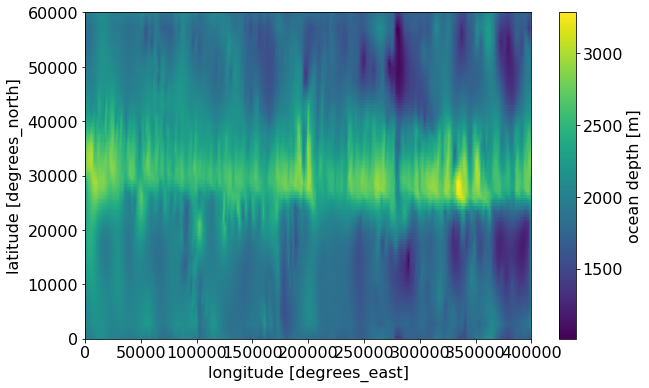

In [20]:
coords_snap['Depth'].plot()

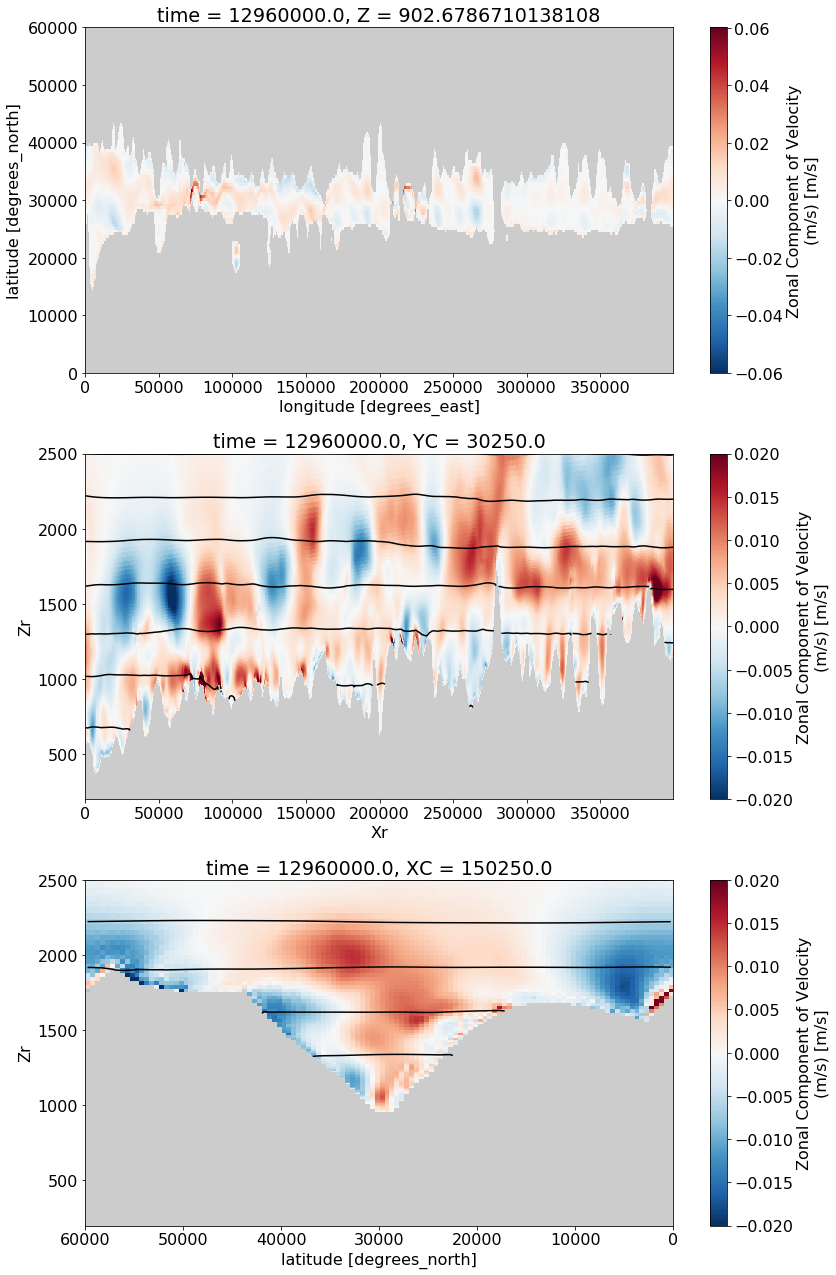

In [21]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1, facecolor=(.8, .8, .8))
ds['UVEL'] = ds['UVEL'].where(ds['UVEL'] != 0.)
ds['UVEL'].isel(time=-1).sel(Z=900, method='nearest').plot(cmap=div_cmap)

plt.subplot(3,1,2, facecolor=(.8, .8, .8))
q = ds['UVEL'].isel(time=-1).sel(YC=3e4, method='nearest').plot(x='Xr_U', y='Zr_U')
q.set_clim([-2e-2, 2e-2])
ds['THETA_BG'].isel(time=-1).sel(YC=3e4, method='nearest').plot.contour(x='Xr', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.25))
plt.ylim([200,2500])

plt.subplot(3,1,3, facecolor=(.8, .8, .8))
q = ds['UVEL'].isel(time=-1).sel(XG=1.5e5, method='nearest').plot(x='YC', y='Zr_U')
q.set_clim([-2e-2, 2e-2])
ds['THETA_BG'].isel(time=-1).sel(XC=1.5e5, method='nearest').plot.contour(x='YC', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.25))
plt.ylim([200,2500])
plt.xlim([6.e4, 0.])

plt.tight_layout()
plt.savefig("../../figures/BBTRE_u.png", bbox_inches='tight', dpi=100.)

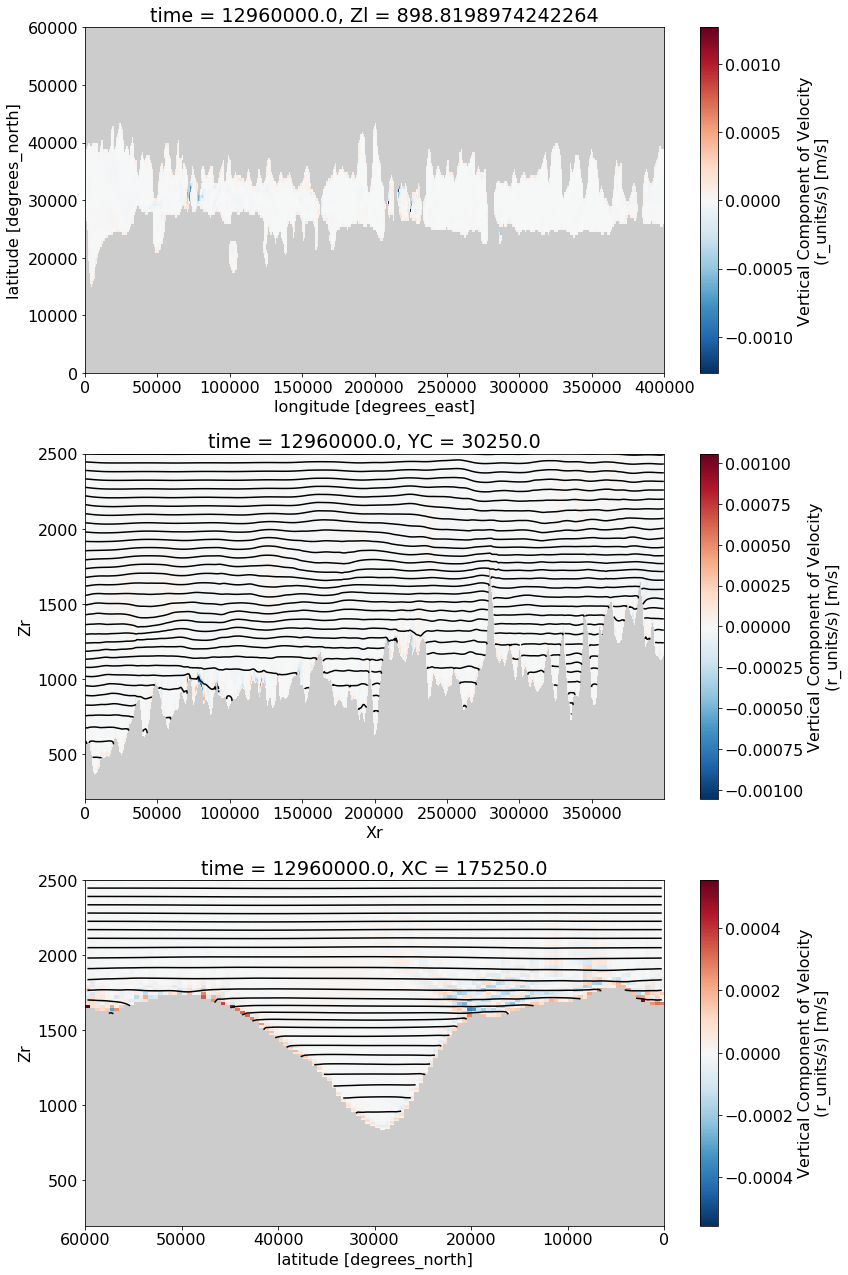

In [25]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1, facecolor=(.8, .8, .8))
ds['WVEL'] = ds['WVEL'].where(ds['WVEL'] != 0.)
ds['WVEL'].isel(time=-1).sel(Zl=900, method='nearest').plot(cmap=div_cmap)

plt.subplot(3,1,2, facecolor=(.8, .8, .8))
q = ds['WVEL'].isel(time=-1).sel(YC=3e4, method='nearest').plot(x='Xr_W', y='Zr_W')
ds['THETA_BG'].isel(time=-1).sel(YC=3e4, method='nearest').plot.contour(x='Xr', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.05))
plt.ylim([200,2500])

plt.subplot(3,1,3, facecolor=(.8, .8, .8))
q = ds['WVEL'].isel(time=-1).sel(XC=1.75e5, method='nearest').plot(x='YC', y='Zr_W')
ds['THETA_BG'].isel(time=-1).sel(XC=1.75e5, method='nearest').plot.contour(x='YC', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.05))
plt.ylim([200,2500])
plt.xlim([6.e4, 0.])

plt.tight_layout()
plt.savefig("../../figures/BBTRE_w.png", bbox_inches='tight', dpi=100.)

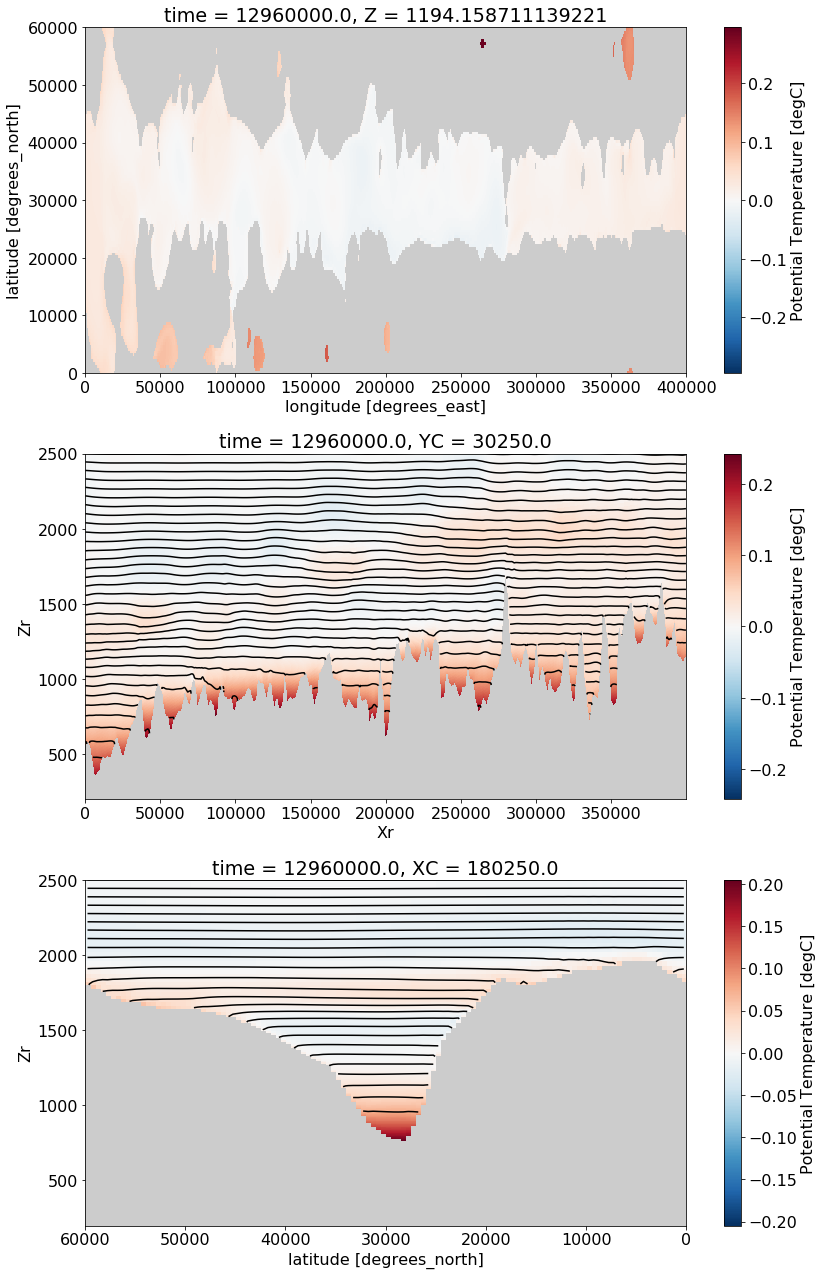

In [27]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1, facecolor=(.8, .8, .8))
ds['THETA'] = ds['THETA'].where(ds['THETA'] != 0.)
ds['THETA'].isel(time=-1).sel(Z=1200, method='nearest').plot(cmap=div_cmap)

plt.subplot(3,1,2, facecolor=(.8, .8, .8))
q = ds['THETA'].isel(time=-1).sel(YC=3e4, method='nearest').plot(x='Xr', y='Zr')
ds['THETA_BG'].isel(time=-1).sel(YC=3e4, method='nearest').plot.contour(x='Xr', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.05))
plt.ylim([200,2500])

plt.subplot(3,1,3, facecolor=(.8, .8, .8))
q = ds['THETA'].isel(time=-1).sel(XC=1.8e5, method='nearest').plot(x='YC', y='Zr')
ds['THETA_BG'].isel(time=-1).sel(XC=1.8e5, method='nearest').plot.contour(x='YC', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.05))
plt.ylim([200,2500])
plt.xlim([6.e4, 0.])

plt.tight_layout()
plt.savefig("../../figures/BBTRE_T.png", bbox_inches='tight', dpi=100.)

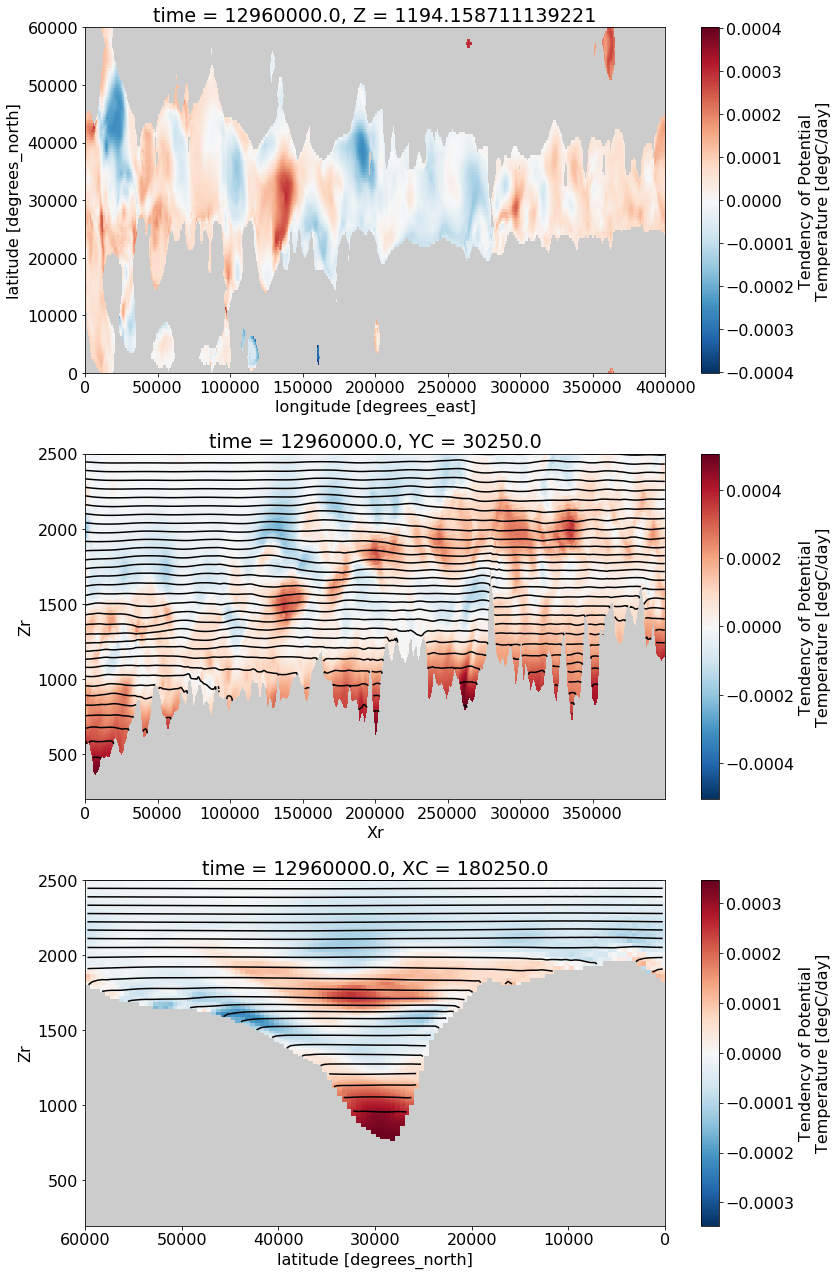

In [36]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1, facecolor=(.8, .8, .8))
ds['TOTTTEND'] = ds['TOTTTEND'].where(ds['TOTTTEND'] != 0.)
ds['TOTTTEND'].isel(time=-1).sel(Z=1200, method='nearest').plot(cmap=div_cmap)

plt.subplot(3,1,2, facecolor=(.8, .8, .8))
q = ds['TOTTTEND'].isel(time=-1).sel(YC=3e4, method='nearest').plot(x='Xr', y='Zr')
ds['THETA_BG'].isel(time=-1).sel(YC=3e4, method='nearest').plot.contour(x='Xr', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.05))
plt.ylim([200,2500])

plt.subplot(3,1,3, facecolor=(.8, .8, .8))
q = ds['TOTTTEND'].isel(time=-1).sel(XC=1.8e5, method='nearest').plot(x='YC', y='Zr')
ds['THETA_BG'].isel(time=-1).sel(XC=1.8e5, method='nearest').plot.contour(x='YC', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.05))
plt.ylim([200,2500])
plt.xlim([6.e4, 0.])

plt.tight_layout()
plt.savefig("../../figures/BBTRE_TOTTTEND.png", bbox_inches='tight', dpi=100.)

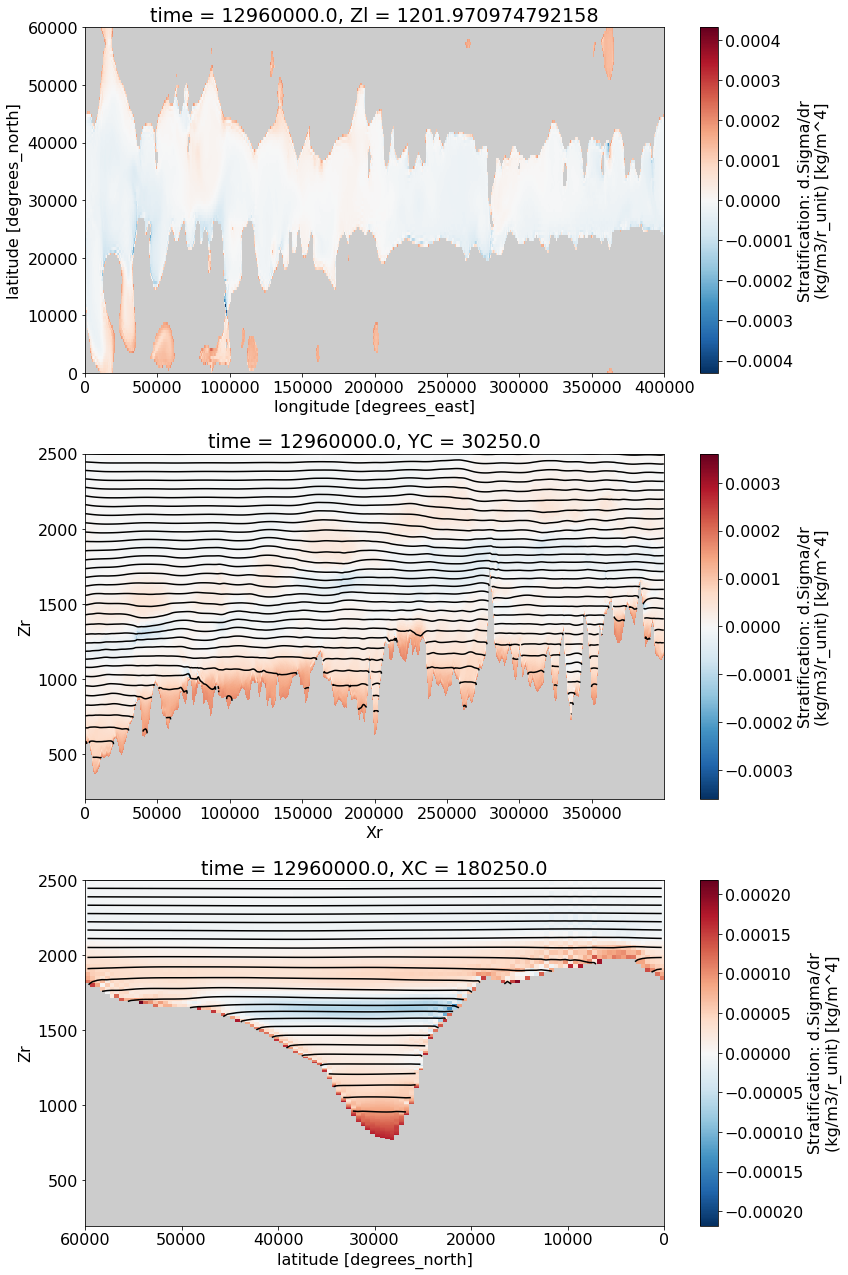

In [40]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1, facecolor=(.8, .8, .8))
ds['DRHODR'] = ds['DRHODR'].where(ds['DRHODR'] != 0.)
ds['DRHODR'].isel(time=-1).sel(Zl=1200, method='nearest').plot(cmap=div_cmap)

plt.subplot(3,1,2, facecolor=(.8, .8, .8))
q = ds['DRHODR'].isel(time=-1).sel(YC=3e4, method='nearest').plot(x='Xr_W', y='Zr_W')
ds['THETA_BG'].isel(time=-1).sel(YC=3e4, method='nearest').plot.contour(x='Xr', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.05))
plt.ylim([200,2500])

plt.subplot(3,1,3, facecolor=(.8, .8, .8))
q = ds['DRHODR'].isel(time=-1).sel(XC=1.8e5, method='nearest').plot(x='YC', y='Zr_W')
ds['THETA_BG'].isel(time=-1).sel(XC=1.8e5, method='nearest').plot.contour(x='YC', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.05))
plt.ylim([200,2500])
plt.xlim([6.e4, 0.])

plt.tight_layout()
plt.savefig("../../figures/BBTRE_DRHODR.png", bbox_inches='tight', dpi=100.)